## Import Library

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2


## Convert Country and Continent Code Function

In [3]:
def dataFrameCountryCode(data,col):
    arr = []
    for i in data[col]:
        try:
            dump = country_name_to_country_alpha2(i)
            arr.append(dump)
        except:
            arr.append(None)
    return pd.DataFrame(arr,columns=['Country Code'])

def dataFrameContinentCode(data,col):
    arr = []
    for x in data[col]:
        try:
            dump = country_alpha2_to_continent_code(x)
            arr.append(dump)
        except:
            arr.append(None)
    return pd.DataFrame(arr,columns=['Continent Code'])

## Reading The Csv Data

In [4]:
df = pd.read_csv('./covid_worldwide.csv')
df.dropna(inplace=True)
df.drop(columns='Serial Number', inplace=True)
df = df.apply(lambda x: x.str.replace(',', ''))
df[['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test', 'Population']] = df[[
    'Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test', 'Population']].astype('int64')
df = df.replace(['S. Korea','UK'],['South Korea','United Kingdom'])
df['Country Code'] = dataFrameCountryCode(data=df,col='Country')
df['Continent Code'] = dataFrameContinentCode(data=df,col='Country Code')
df.dropna(how='any',inplace=True)
df

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,Country Code,Continent Code
0,USA,104196861,1132935,101322779,1741147,1159832679,334805269,US,NA
1,India,44682784,530740,44150289,1755,915265788,1406631776,IN,AS
2,France,39524311,164233,39264546,95532,271490188,65584518,FR,EU
3,Germany,37779833,165711,37398100,216022,122332384,83883596,DE,EU
4,Brazil,36824580,697074,35919372,208134,63776166,215353593,BR,SA
...,...,...,...,...,...,...,...,...,...
165,Haiti,34076,860,33033,183,132422,11680283,WS,NA
166,Mali,32783,743,31957,83,789342,21473764,MC,AF
167,Cayman Islands,31472,37,8553,22882,222773,67277,DM,OC
168,Saint Lucia,29803,409,29095,299,210983,185113,DJ,OC


## Lima Negara Teratas Dengan Kasus Covid-19 Tertinggi

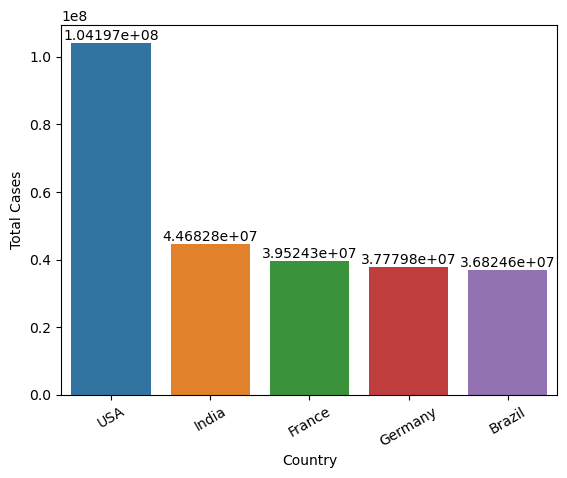

In [5]:
dc = df[['Country', 'Total Cases']]
topCasesTop5 = dc.sort_values(by='Total Cases', ascending=False).head(5)
dp = sns.barplot(data=topCasesTop5, x='Country', y='Total Cases')
for i in dp.containers:
    dp.bar_label(i,)
plt.xticks(rotation=30)
plt.show()

## Persentase Angka Kematian Tertinggi Kasus Covid-19

/tmp/ipykernel_32352/2715320324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['Death Rate Covid'] = dd.apply(lambda x: x['Total Deaths'] / x['Total Cases'] * 1000,axis=1 )


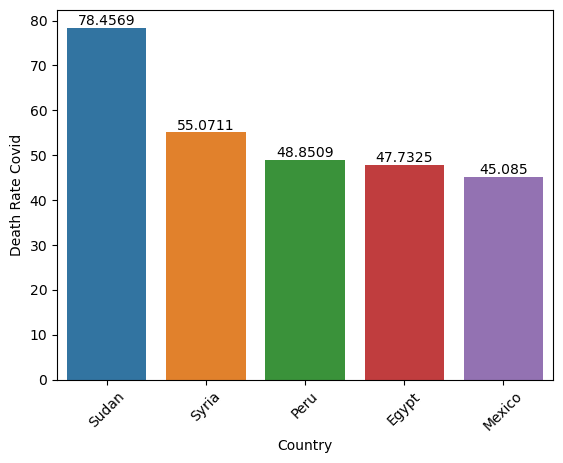

In [6]:
dd = df[['Country','Total Cases','Total Deaths']]
dd['Death Rate Covid'] = dd.apply(lambda x: x['Total Deaths'] / x['Total Cases'] * 1000,axis=1 )
dd = dd.sort_values(by='Death Rate Covid',ascending=False)
ax = sns.barplot(x=dd['Country'].head(),y=dd['Death Rate Covid'].head())
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

## Show World Map Covid 19 Cases

In [7]:
df

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,Country Code,Continent Code
0,USA,104196861,1132935,101322779,1741147,1159832679,334805269,US,NA
1,India,44682784,530740,44150289,1755,915265788,1406631776,IN,AS
2,France,39524311,164233,39264546,95532,271490188,65584518,FR,EU
3,Germany,37779833,165711,37398100,216022,122332384,83883596,DE,EU
4,Brazil,36824580,697074,35919372,208134,63776166,215353593,BR,SA
...,...,...,...,...,...,...,...,...,...
165,Haiti,34076,860,33033,183,132422,11680283,WS,NA
166,Mali,32783,743,31957,83,789342,21473764,MC,AF
167,Cayman Islands,31472,37,8553,22882,222773,67277,DM,OC
168,Saint Lucia,29803,409,29095,299,210983,185113,DJ,OC
